# Getting started

First, we have to define the optimization problem.

In [1]:
import os
import sys
import pathlib

sys.path.append(os.path.join(str(pathlib.Path.cwd().parent)))

## Features

In [2]:
from bofire.data_models.features.api import ContinuousInput, DiscreteInput, CategoricalInput, CategoricalDescriptorInput

x1 = ContinuousInput(key="x1", bounds=[0,1])
x2 = ContinuousInput(key="x2", bounds=[0,1])
x3 = ContinuousInput(key="x3", bounds=[0,1])
x4 = DiscreteInput(key="x4", values=[1, 2, 5, 7.5])
x5 = CategoricalInput(key="x5", categories=["A", "B", "C"], allowed=[True,True,False])
x6 = CategoricalDescriptorInput(key="x6", categories=["c1", "c2", "c3"], descriptors=["d1", "d2"], values = [[1,2],[2,5],[1,7]])

c:\Users\J32616\Repositories\bofire\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\J32616\Repositories\bofire\bofire\utils\cheminformatics.py:9: UserWarning: rdkit not installed, BoFire's cheminformatics utilities cannot be used.
  warnings.warn(


In [3]:
from bofire.data_models.features.api import ContinuousOutput
from bofire.data_models.objectives.api import MaximizeObjective, MinimizeObjective

objective1 = MaximizeObjective(
    w=1.0, 
    lower_bound=0, 
    upper_bound=1,
)
y1 = ContinuousOutput(key="y1", objective=objective1)

objective2 = MinimizeObjective(
    w=1.0
)
y2 = ContinuousOutput(key="y2", objective=objective2)

In [4]:
from bofire.data_models.domain.api import Inputs, Outputs

input_features = Inputs(features = [x1, x2, x3, x4, x5, x6])
output_features = Outputs(features=[y1, y2])

In [5]:
x5 = input_features.get_by_key('x5')
x5

CategoricalInput(type='CategoricalInput', key='x5', categories=['A', 'B', 'C'], allowed=[True, True, False])

In [6]:
input_features.get_keys()

['x1', 'x2', 'x3', 'x4', 'x6', 'x5']

In [7]:
output_features.get_keys()

['y1', 'y2']

In [8]:
free_inputs = input_features.get_free()
fixed_inputs = input_features.get_fixed()

In [9]:
samples_x5 = x5.sample(2)
samples_x5

0    A
1    B
Name: x5, dtype: object

In [10]:
X = input_features.sample(n=10)
X

,x1,x2,x3,x4,x6,x5
0,0.446951,0.233108,0.807302,1.0,c2,B
1,0.902728,0.905087,0.299669,5.0,c1,B
2,0.437934,0.846569,0.023396,7.5,c1,A
3,0.343520,0.058300,0.031096,5.0,c3,A
4,0.204773,0.211742,0.103538,5.0,c1,B
5,0.936187,0.330185,0.903871,5.0,c1,A
6,0.426863,0.048808,0.187039,7.5,c1,A
7,0.361787,0.982932,0.287825,5.0,c3,A
8,0.517546,0.210103,0.531776,5.0,c1,B
9,0.602998,0.046365,0.683659,5.0,c1,B


## Constraints

In [11]:
from bofire.data_models.constraints.api import LinearEqualityConstraint, LinearInequalityConstraint

# A mixture: x1 + x2 + x3 = 1
constr1 = LinearEqualityConstraint(features=["x1", "x2", "x3"], coefficients=[1,1,1], rhs=1)

# x1 + 2 * x3 < 0.8
constr2 = LinearInequalityConstraint(features=["x1", "x3"], coefficients=[1, 2], rhs=0.8)

In [12]:
from bofire.data_models.constraints.api import NonlinearEqualityConstraint, NonlinearInequalityConstraint

# The unit circle: x1**2 + x2**2 = 1
constr3 = NonlinearEqualityConstraint(expression="x1**2 + x2**2 - 1")

# Require x1 < 0.5 if x5 == "A"
constr4 = NonlinearInequalityConstraint(expression="(x1 - 0.5) * (x5 =='A')")

In [13]:
from bofire.data_models.constraints.api import NChooseKConstraint

# Only 2 or 3 out of 3 parameters can be greater than zero
constr5 = NChooseKConstraint(features=["x1", "x2", "x3"], min_count=2, max_count=3, none_also_valid=True)

In [14]:
from bofire.data_models.domain.api import Constraints

constraints = Constraints(constraints=[constr1, constr2])

In [15]:
constr2.is_fulfilled(X).values

array([False, False,  True,  True,  True, False, False, False, False,
       False])

In [16]:
from bofire.data_models.objectives.api import MinimizeSigmoidObjective

output_constraint = MinimizeSigmoidObjective(
    w=1.0, 
    steepness=10,
    tp=0.5
)
y3= ContinuousOutput(key="y3", objective=output_constraint)

output_features = Outputs(features=[y1, y2, y3])

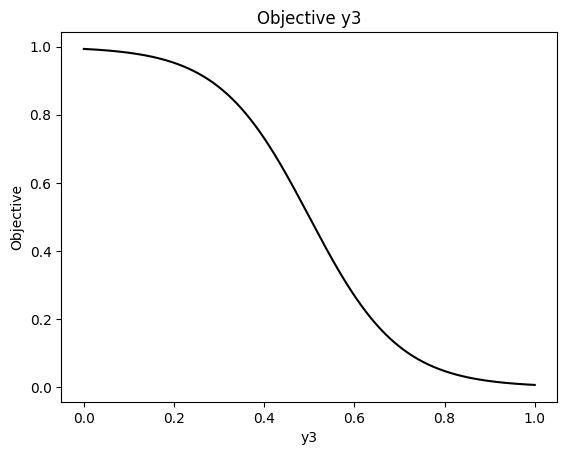

In [17]:
_ = y3.plot(lower=0, upper=1)

## Domain

In [18]:
from bofire.data_models.domain.api import Domain

domain = Domain(
    input_features=input_features, 
    output_features=output_features, 
    constraints=constraints
    )

In [33]:
# only runs after merge from Behrang
domain_single_objective = Domain.from_list(
    input_features=[x1, x2, x3, x4, x5, x6], 
    output_features=[y1], 
    constraints=[]
    )

AttributeError: type object 'Domain' has no attribute 'from_list'

In [35]:
domain_single_objective = Domain(
    input_features=Inputs(features=[x1, x2, x3, x4, x5, x6]), 
    output_features=Outputs(features=[y1])
    )

In [19]:
domain.get_feature_reps_df()

,Type,Description
x1,ContinuousInput,"[0.0,1.0]"
x2,ContinuousInput,"[0.0,1.0]"
x3,ContinuousInput,"[0.0,1.0]"
x4,DiscreteInput,type='DiscreteInput' key='x4' unit=None values...
x6,CategoricalDescriptorInput,3 categories
x5,CategoricalInput,3 categories
y1,ContinuousOutput,ContinuousOutputFeature
y2,ContinuousOutput,ContinuousOutputFeature
y3,ContinuousOutput,ContinuousOutputFeature


In [20]:
domain.get_constraint_reps_df()

,Type,Description
0,LinearEqualityConstraint,1.0 * x1 + 1.0 * x2 + 1.0 * x3 = 1.0
1,LinearInequalityConstraint,1.0 * x1 + 2.0 * x3 <= 0.8


# Strategies

## Random strategy

In [22]:
from bofire.data_models.strategies.api import RandomStrategy

import bofire.strategies.mapper as strategy_mapper

strategy_data_model = RandomStrategy(domain=domain)

random_strategy = strategy_mapper.map(strategy_data_model)

In [24]:
random_candidates = random_strategy.ask(2)

random_candidates

,x1,x2,x3,x4,x6,x5
0,0.169125,0.682277,0.148597,1.0,c2,A
1,0.033154,0.873228,0.093617,5.0,c2,A


## Single objective Bayesian Optimization

In [36]:
import pandas as pd

X = pd.DataFrame(
    data={
        "x1": [0, 0.5, 0.2, 0.1, 0, 0.5, 0.2, 0.1, 0, 0.5, 0.2, 0.1],
        "x2": [0.7, 0.5, 0.6, 0.7, 0.7, 0.5, 0.6, 0.7, 0.7, 0.5, 0.6, 0.7],
        "x3": [0.3, 0, 0.2, 0.2, 0.3, 0, 0.2, 0.2, 0.3, 0, 0.2, 0.2],
        "x4": [1, 2, 5, 7.5, 2, 5, 7.5, 1, 5, 7.5, 1, 2],
        "x5": ["C", "B", "A", "A", "B", "B", "A", "B", "A", "A", "B", "A"],
        "x6": ["c1", "c2", "c1", "c2", "c3", "c3", "c1", "c2", "c3", "c1", "c2", "c3"],
        "y1": [2, 4.25, 6.16, 9.59, 5, 8.25, 8.66, 3.09, 8, 8.75, 3.16, 5.09],
        "valid_y1": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    }
)

X

,x1,x2,x3,x4,x5,x6,y1,valid_y1
0,0.0,0.7,0.3,1.0,C,c1,2.00,1
1,0.5,0.5,0.0,2.0,B,c2,4.25,1
2,0.2,0.6,0.2,5.0,A,c1,6.16,1
3,0.1,0.7,0.2,7.5,A,c2,9.59,1
4,0.0,0.7,0.3,2.0,B,c3,5.00,1
5,0.5,0.5,0.0,5.0,B,c3,8.25,1
6,0.2,0.6,0.2,7.5,A,c1,8.66,1
7,0.1,0.7,0.2,1.0,B,c2,3.09,1
8,0.0,0.7,0.3,5.0,A,c3,8.00,1
9,0.5,0.5,0.0,7.5,A,c1,8.75,1


In [41]:
from bofire.data_models.strategies.api import SoboStrategy
from bofire.data_models.acquisition_functions.api import qNEI

sobo_strategy_data_model = SoboStrategy(domain=domain_single_objective, acquisition_function=qNEI())

sobo_strategy = strategy_mapper.map(sobo_strategy_data_model)

sobo_strategy.tell(X)

In [44]:
sobo_strategy.ask(candidate_count=1, add_pending=True)

c:\Users\J32616\Repositories\bofire\venv\lib\site-packages\botorch\optim\initializers.py:224: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
c:\Users\J32616\Repositories\bofire\venv\lib\site-packages\botorch\optim\initializers.py:224: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
c:\Users\J32616\Repositories\bofire\venv\lib\site-packages\botorch\optim\initializers.py:224: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
c:\Users\J32616\Repositories\bofire\venv\lib\site-packages\botorch\optim\initializers.py:224: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(
c:\Users\J32616\Repositories\bof

,x1,x2,x3,x4,x6,x5,y1_pred,y1_sd,y1_des
0,1.0,0.0,0.0,7.5,c3,A,9.813998,0.703783,9.813998
